In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import pickle
from scipy import interpolate
from scipy.interpolate import lagrange
from scipy.interpolate import BSpline

In [2]:
radii = [0.075, 0.0875, 0.1, 0.1125, 0.125, 0.1375, 0.15, 0.1625, 0.175, 0.1875, 0.2, 0.2125, 0.225, 0.2375, 0.25]
phase_list = [-3.00185845, -2.89738421, -2.7389328, -2.54946247, -2.26906522, -1.89738599, -1.38868364, -0.78489682, -0.05167712, 0.63232107, 1.22268106, 1.6775137, 2.04169308, 2.34964137, 2.67187105]

radii = np.asarray(radii)
phase_list = np.asarray(phase_list)

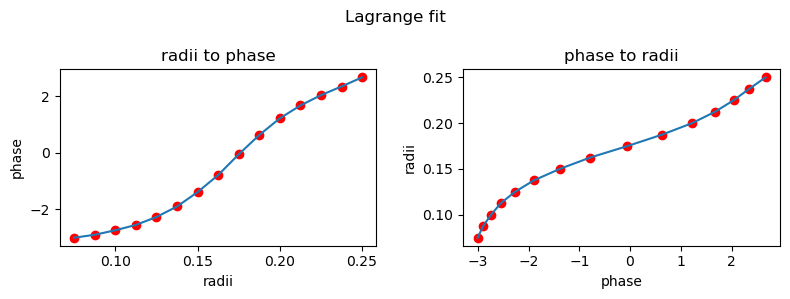

In [3]:
# lagrangian mapping function

poly = lagrange(radii, phase_list)
poly2 = lagrange(phase_list, radii)

fig, ax = plt.subplots(1,2, figsize=(8,3))

fig.suptitle("Lagrange fit")
ax[0].scatter(radii, phase_list, c = 'r')
ax[0].plot(radii, Polynomial(poly.coef[::-1])(radii), label='Polynomial')
ax[0].set_xlabel("radii")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")

ax[1].scatter(phase_list, radii, c = 'r')
ax[1].plot(phase_list, Polynomial(poly2.coef[::-1])(phase_list), label='Polynomial')
ax[1].set_xlabel("phase")
ax[1].set_ylabel("radii")
ax[1].set_title("phase to radii")

fig.tight_layout()

radii_to_phase = poly.coef[::-1] # these are coefficients of the polynomials. they are the slope of the curve at one of the 15 terms of the lagrange equation
phase_to_radii = poly2.coef[::-1] # these are coefficients of the polynomials. they are the slope of the curve at one of the 15 terms of the lagrange equation

# filename = "radii_to_phase.pkl"
# with open(filename,"wb") as f:
#     pickle.dump(radii_to_phase,f)

In [4]:
test_radii = np.random.uniform(0.07, 0.28, size=50)

In [5]:
to_phase = []
for radius in test_radii:
    to_phase.append(Polynomial(radii_to_phase)(radius))

(-6.0, 6.0)

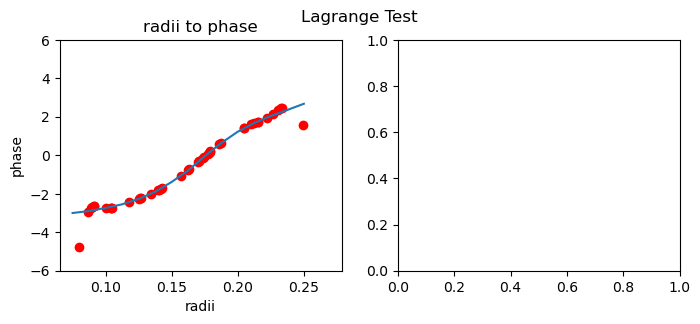

In [6]:
plt.close("all")

fig, ax = plt.subplots(1,2, figsize=(8,3))

fig.suptitle("Lagrange Test")
ax[0].scatter(test_radii, to_phase, c = 'r')
ax[0].plot(radii, Polynomial(poly.coef[::-1])(radii), label='Polynomial')
ax[0].set_xlabel("radii")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")
ax[0].set_ylim([-6,6])

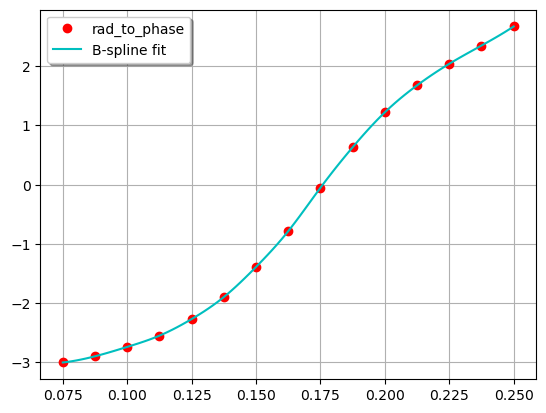

In [7]:
### B-splines ###

#p_list = [[radii,phase] for radii, phase in zip(radii,phase_list)]

tck = interpolate.splrep(radii, phase_list, s=0, k=3)
x_new = np.linspace(radii[0], radii[-1], 100)
y_fit = interpolate.BSpline(*tck)(x_new)

tck_ = interpolate.splrep(phase_list, radii, s=0, k=3)
x_new_ = np.linspace(phase_list[0], phase_list[-1], 100)
y_fit_ = interpolate.BSpline(*tck_)(x_new_)

plt.plot(radii,phase_list, 'ro', label="rad_to_phase")
plt.plot(x_new, y_fit, '-c', label="B-spline fit")
plt.legend(loc="best",fancybox=True, shadow=True)
plt.grid()

In [8]:
min_rad=0.07
max_rad=0.3

min_phi = -3.14
max_phi = 3.14
test_radii = np.random.uniform(min_rad, max_rad, size=50)
test_phase = np.random.uniform(min_phi, max_phi, size=50)

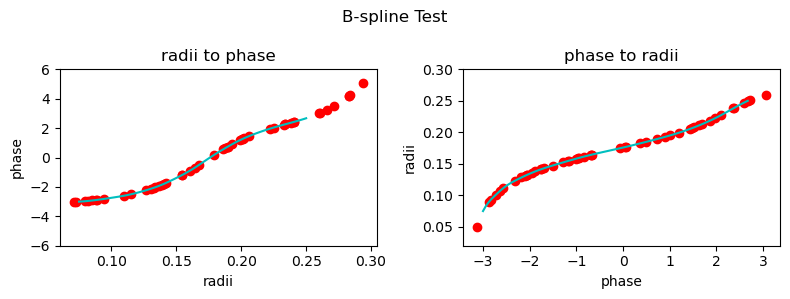

In [9]:
plt.close("all")

fig, ax = plt.subplots(1,2, figsize=(8,3))

to_phase = []
for radius in test_radii:
    to_phase.append(interpolate.splev(test_radii,tck))
to_phase = np.asarray(to_phase)

to_radii = []
for phase in test_phase:
    to_radii.append(interpolate.splev(test_phase,tck_))
to_radii = np.asarray(to_radii)

fig.suptitle("B-spline Test")
ax[0].scatter(test_radii, to_phase[0], c = 'r')
ax[0].plot(x_new, y_fit, '-c', label="B-spline fit")
ax[0].set_xlabel("radii")
ax[0].set_ylabel("phase")
ax[0].set_title("radii to phase")
ax[0].set_ylim([-6,6])

ax[1].scatter(test_phase, to_radii[0], c = 'r')
ax[1].plot(x_new_, y_fit_, '-c', label="B-spline fit")
ax[1].set_xlabel("phase")
ax[1].set_ylabel("radii")
ax[1].set_title("phase to radii")
ax[1].set_ylim([min_rad-0.05,max_rad])

fig.tight_layout()

#to_phase[0].shape

In [10]:
test_radii

array([0.26011755, 0.20069265, 0.22208114, 0.16709304, 0.1543911 ,
       0.28266339, 0.15418758, 0.12698411, 0.18630338, 0.07128922,
       0.08515119, 0.28276876, 0.1874754 , 0.19871777, 0.29364868,
       0.08885194, 0.11002082, 0.23279479, 0.19273338, 0.23394921,
       0.23359128, 0.11537965, 0.18942803, 0.22491449, 0.24051975,
       0.07980938, 0.20139536, 0.27121413, 0.26102504, 0.09438579,
       0.07234532, 0.28393447, 0.1788532 , 0.1308121 , 0.1405294 ,
       0.08156689, 0.13329983, 0.24070562, 0.13309768, 0.2379797 ,
       0.14189078, 0.18961825, 0.26578843, 0.13884416, 0.20599239,
       0.08805529, 0.16411424, 0.16033523, 0.20230833, 0.13681477])

In [11]:
test_phase

array([ 1.51799213, -0.68962107,  0.07319133,  0.48363524, -2.72281699,
       -0.83721823,  0.04110824,  1.9794331 ,  1.87018232, -2.88178634,
        1.00186858, -1.75020749,  2.36503301, -0.93884895, -0.95952454,
       -0.05647852, -2.31985803,  1.43686339, -2.63723002, -1.15453557,
       -0.66780749, -1.88484533, -1.00140753,  1.47572927, -2.06702869,
       -2.17758571,  1.62943488, -1.18803155, -2.05472809, -1.68716965,
        0.36799487,  2.67194764,  0.72302552,  2.38176686,  3.05357965,
       -2.5667818 , -2.09934952,  1.68448547, -3.13134313, -0.69116234,
       -1.5116532 ,  1.20520053,  2.09879213, -1.28011675,  2.71328443,
       -2.8312563 ,  2.5834879 , -1.7613506 , -1.94590795,  0.90309074])

In [14]:
to_phase[0]

array([ 2.99996673,  1.25141211,  1.96311355, -0.52301365, -1.19020104,
        4.18279262, -1.19962678, -2.21722577,  0.57052946, -3.01497204,
       -2.92267341,  4.19033736,  0.63105749,  1.16817083,  5.09873847,
       -2.88194227, -2.59286944,  2.23651031,  0.89365012,  2.26431903,
        2.25570827, -2.49340923,  0.73042963,  2.03944488,  2.42303555,
       -2.97129821,  1.28005502,  3.48514281,  3.03400095, -2.81351746,
       -3.01225893,  4.27531004,  0.16902421, -2.11105648, -1.7854379 ,
       -2.95682581, -2.0364186 ,  2.42760661, -2.0426774 ,  2.36121464,
       -1.73221691,  0.7400031 ,  3.22809836, -1.84889619,  1.45598159,
       -2.89111442, -0.69527549, -0.89988478,  1.31653381, -1.92132788])

In [18]:
to_radii[0]

array([0.2077649 , 0.16424511, 0.17715694, 0.18465568, 0.10112639,
       0.16150862, 0.17659658, 0.22266278, 0.21877653, 0.08897597,
       0.19496936, 0.14155252, 0.23813551, 0.159519  , 0.15910478,
       0.17491838, 0.12309098, 0.20550466, 0.10700437, 0.15506766,
       0.1646348 , 0.1378662 , 0.15825678, 0.20657521, 0.13215207,
       0.12832655, 0.21103168, 0.15435436, 0.13256255, 0.14314632,
       0.18248626, 0.25000265, 0.18926469, 0.23882461, 0.25959802,
       0.11148134, 0.13105836, 0.21271591, 0.05037122, 0.16421744,
       0.14727164, 0.19957959, 0.2272245 , 0.15237081, 0.25139828,
       0.09327411, 0.24681338, 0.14126288, 0.1360432 , 0.19288445])